<a href="https://colab.research.google.com/github/Japesh21/MNIST-Digit-Image-Classifier/blob/main/image_classifer_with_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8815 - loss: 0.4257
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9648 - loss: 0.1188
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9762 - loss: 0.0761
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9835 - loss: 0.0550
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9873 - loss: 0.0428
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0877

Test accuracy: 0.9772999882698059
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


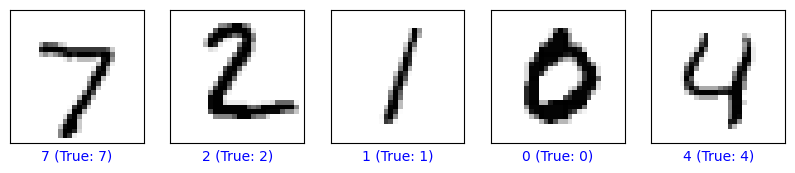

In [ ]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 3: Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 4: Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
model.fit(x_train, y_train, epochs=5)

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

# Step 8: Make a prediction
predictions = model.predict(x_test)

# Optional: Visualize predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array[i])
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} (True: {true_label})", color=color)

# Show first 5 predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plot_image(i, predictions, y_test, x_test)
plt.show()


In [ ]:
import cv2
import numpy as np

def preprocess(img):
    # 1. Grab raw array if Gradio wrapped it in a dict
    if isinstance(img, dict):
        img = img.get("image") or list(img.values())[0]
    # 2. Convert to grayscale
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 3. Invert (so digit is white on black)
    img = cv2.bitwise_not(img)
    # 4. Threshold to pure black/white, remove noise
    _, img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
    # 5. Find bounding box of the digit
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x,y,w,h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        img = img[y:y+h, x:x+w]
    # 6. Resize to fit into 20×20 box, preserving aspect ratio
    h, w = img.shape
    if h > w:
        new_h = 20
        new_w = int(w * (20/h))
    else:
        new_w = 20
        new_h = int(h * (20/w))
    img = cv2.resize(img, (new_w, new_h))
    # 7. Pad to 28×28, centering the digit
    pad_top = (28 - new_h) // 2
    pad_bottom = 28 - new_h - pad_top
    pad_left = (28 - new_w) // 2
    pad_right = 28 - new_w - pad_left
    img = cv2.copyMakeBorder(img, pad_top, pad_bottom, pad_left, pad_right,
                             cv2.BORDER_CONSTANT, value=0)
    # 8. Normalize
    img = img.astype("float32") / 255.0
    return img.reshape(1, 28, 28, 1)


In [ ]:
!pip install --upgrade gradio

In [ ]:
!pip install --upgrade gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import cv2
import numpy as np
from tensorflow import keras
import os

# Load MNIST dataset for training
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Build CNN model
model = keras.models.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Conv2D(32, 3, activation="relu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(64, 3, activation="relu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train if model not already saved
MODEL_FILENAME = "mnist_cnn_model.keras"
if not os.path.exists(MODEL_FILENAME):
    model.fit(x_train, y_train, epochs=5, validation_split=0.1)
    model.save(MODEL_FILENAME)
else:
    model = keras.models.load_model(MODEL_FILENAME)

# Preprocess function for image
def preprocess(img):
    # Debugging: print the type and contents of the img
    print(f"Preprocessing - Image: {img}")

    # Check if it's a dictionary (Gradio Sketchpad output is a dictionary)
    if isinstance(img, dict):
        print(f"Image dictionary contents: {img}")  # Print entire dictionary to debug
        # Extract the image from the 'composite' key
        if "composite" in img:
            img = img["composite"]
        else:
            raise ValueError("Image not found in the dictionary.")

    # Ensure the image is a NumPy array
    if not isinstance(img, np.ndarray):
        raise ValueError(f"Expected a NumPy array but got {type(img)}")

    # Check image dimensions, if in RGB, convert to grayscale
    if img.ndim == 3:  # If the image is in RGB format
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)

    # Invert the image (white digits on black background)
    img = cv2.bitwise_not(img)

    # Resize image to 28x28 (matching the model's input size)
    img = cv2.resize(img, (28, 28))

    # Normalize the image
    img = img.astype("float32") / 255.0

    # Reshape to (1, 28, 28, 1) to fit the model's expected input shape
    return img.reshape(1, 28, 28, 1)

# Prediction function
def predict_digit(img):
    try:
        # Preprocess the image
        processed_img = preprocess(img)

        # Make prediction
        pred = model.predict(processed_img)
        digit = np.argmax(pred[0])  # Get digit with the highest probability

        return f"Predicted Digit: {digit}"
    except Exception as e:
        return f"Error in prediction: {e}"

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## ✏️ Draw a digit (0–9) below → Predict")
    with gr.Row():
        # Sketchpad for drawing
        sk = gr.Sketchpad(
            label="Draw here",
            image_mode="L"  # Grayscale mode
        )
        out = gr.Textbox(label="Prediction")
    btn = gr.Button("Predict")
    btn.click(fn=predict_digit, inputs=sk, outputs=out)

# Launch Gradio app
demo.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://96f4552cbf651ab65a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Preprocessing - Image: {'background': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 'layers': [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)], 'composite': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)}
Image dictionary contents: {'background': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
      